In [1]:
import pandas as pd
import matplotlib
import numpy as np
import numpy.linalg as LA
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import sklearn
from sklearn.manifold import TSNE
import Utils.BuildMatrix as bm
import Utils.TaggedRowVecs as trv
import Utils.TrvPlot as trvPlt
np.core.arrayprint._line_width = 160
%matplotlib inline

In [2]:
RS = 1277
def TSNEtrv(tvs:trv.TaggedRowVecs):
    proj = TSNE(n_components=2, random_state=RS).fit_transform(tvs.row_vecs)
    return trv.TaggedRowVecs(row_vecs=proj, tags=tvs.tags)

In [3]:
def multiTSNE(tvs:trv.TaggedRowVecs, count:int, seed:int, n_components:int=2):
    st = np.empty(shape=(len(tvs.row_vecs),0))
    for i in range(count):
        res = TSNE(n_components=2, random_state=seed + i).fit_transform(tvs.row_vecs)
        st = np.hstack([st, res])
    return TSNEtrv(trv.TaggedRowVecs(row_vecs=st, tags=tvs.tags))

In [4]:
def PlotTSNE(tvs:trv.TaggedRowVecs):
        res = TSNEtrv(tvs)
        trvPlt.PlotTrvs(res)
        plt.show()
        return res

In [5]:
q = trv.Gaussians(dim=5)
multiTSNE(tvs=q, count=3, seed=2132)

TaggedRowVecs(row_vecs=array([[ -1.52316284e-05,  -1.05035059e-04],
       [  3.63677328e-05,   8.71352192e-05]]), tags=[('.', 0), ('.', 1)])

#### Gaussian - Gaussian/core

In [6]:
dimB = 100
numClustersB1 = 3
stdDevB1 = 10.0
stdDevB2a = 1.0
stdDevB2b = 0.01
numPointsB2a = 200
numPointsB2b = 60

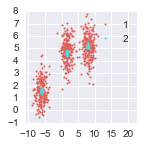

In [7]:
q = trv.Gaussians(
    centers=trv.Single(vec=np.array([0] * dimB), tag='.'),
    covMatrix=np.matrix(np.diag([stdDevB1] * dimB)),
    num_points=numClustersB1)
tcvGg = trv.GaussianTwins(
    centers=q,
    covMatrix1=np.matrix(np.diag([stdDevB2a] * dimB)),
    covMatrix2=np.matrix(np.diag([stdDevB2b] * dimB)),
    num_points1=numPointsB2a, 
    num_points2=numPointsB2b)
resGg = trvPlt.PlotTrvs(
                tcvGg, 
                figsize=(2,2), 
                markersize=2,
                proj_matrix=bm.randOrthoNormalMatrix(dimB),
                tag_extractor=lambda x: x[0],
                showLegend=True)

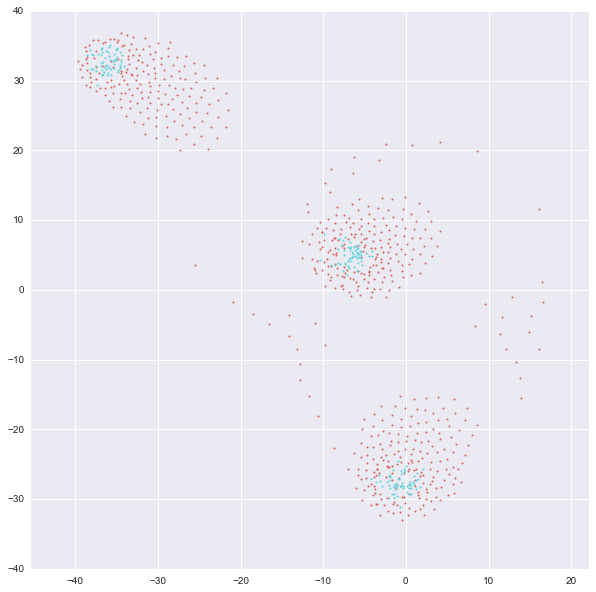

In [8]:
resG = TSNEtrv(tcvGg)
out = trvPlt.PlotTrvs(resG,
                figsize=(10,10), 
                markersize=2, 
                tag_extractor=lambda x: x[0])

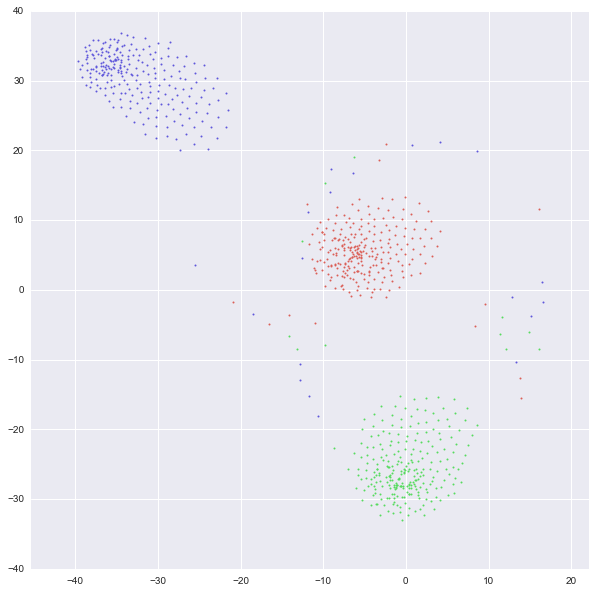

In [9]:
resG4g = trvPlt.PlotTrvs(
                resG, 
                figsize=(10,10), 
                markersize=2,
                tag_extractor=lambda x: x[1][0])

#### Gaussian - Gaussain/core using multiTSNE

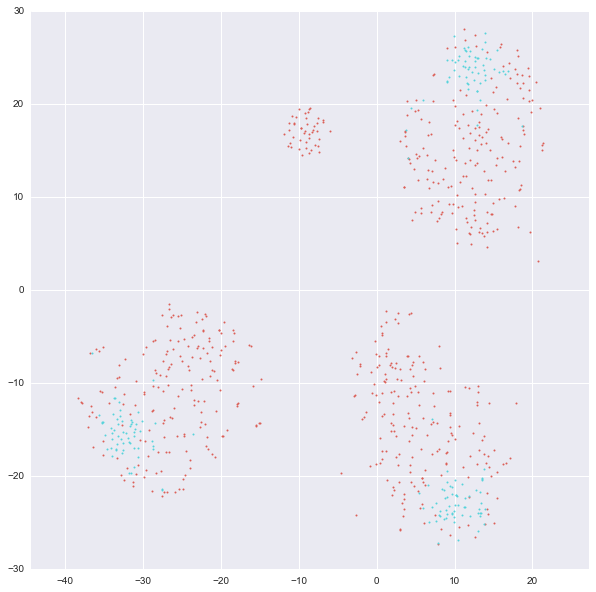

In [10]:
resGm = multiTSNE(tvs=tcvGg, count=20, seed=1223)

out = trvPlt.PlotTrvs(resGm,
                figsize=(10,10),
                markersize=2,
                tag_extractor=lambda x: x[0])

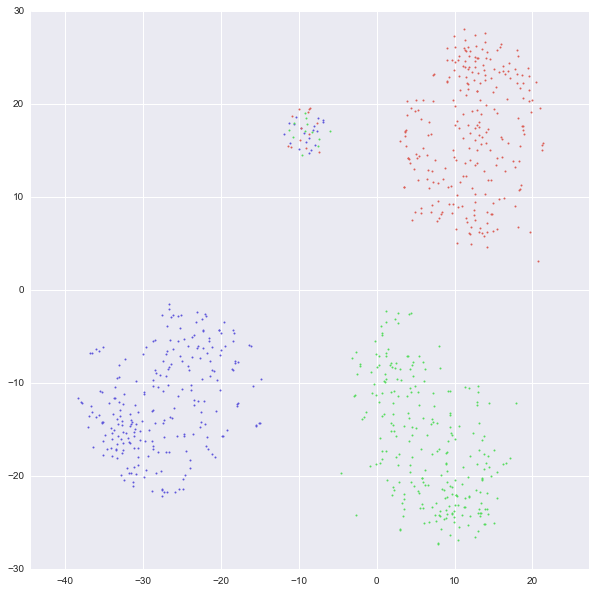

In [11]:
resG4g = trvPlt.PlotTrvs(
                resGm, 
                figsize=(10,10), 
                markersize=2,
                tag_extractor=lambda x: x[1][0])

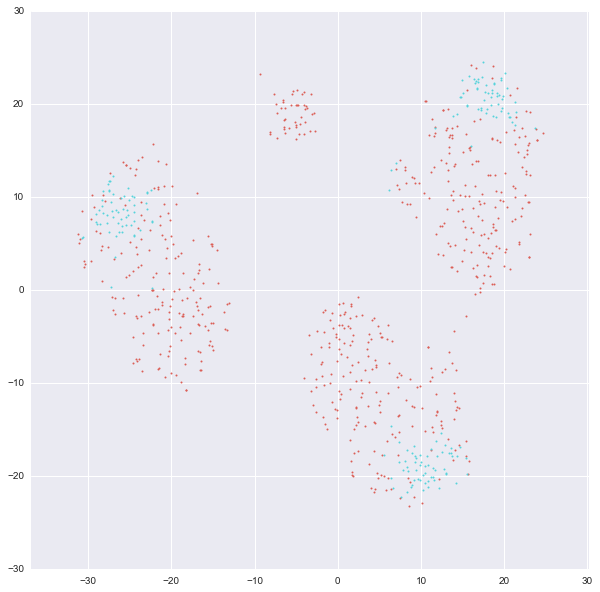

In [12]:
resGm4 = multiTSNE(tvs=tcvGg, count=10, seed=1223, n_components=8)

out = trvPlt.PlotTrvs(resGm4,
                figsize=(10,10),
                markersize=2,
                tag_extractor=lambda x: x[0])

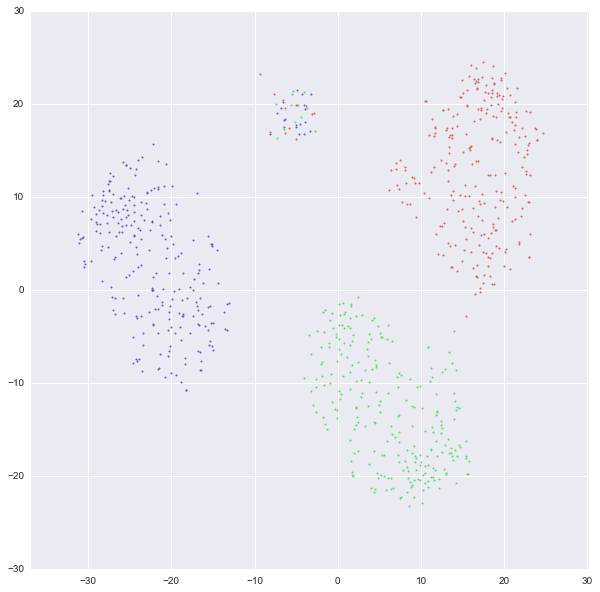

In [13]:
outg = trvPlt.PlotTrvs(
                resGm4, 
                figsize=(10,10), 
                markersize=2,
                tag_extractor=lambda x: x[1][0])

